In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import numpy
import imageio
import glob
%matplotlib inline

In [2]:
# Create data
N = 30000
j3eta_array = np.random.uniform(-3,3,N)
j3phi_array = np.random.uniform(-3,3,N)
colors = (0,0,0)
area = np.pi*3

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

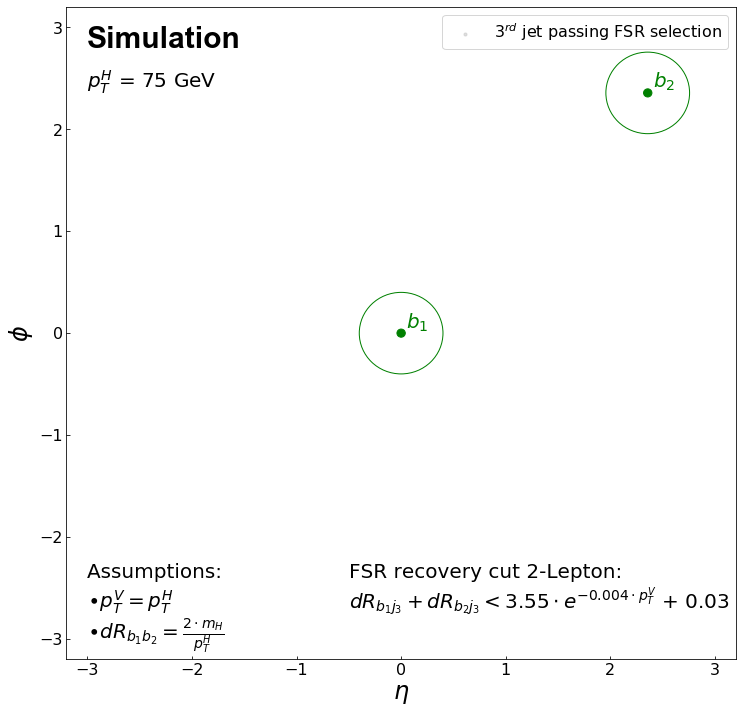

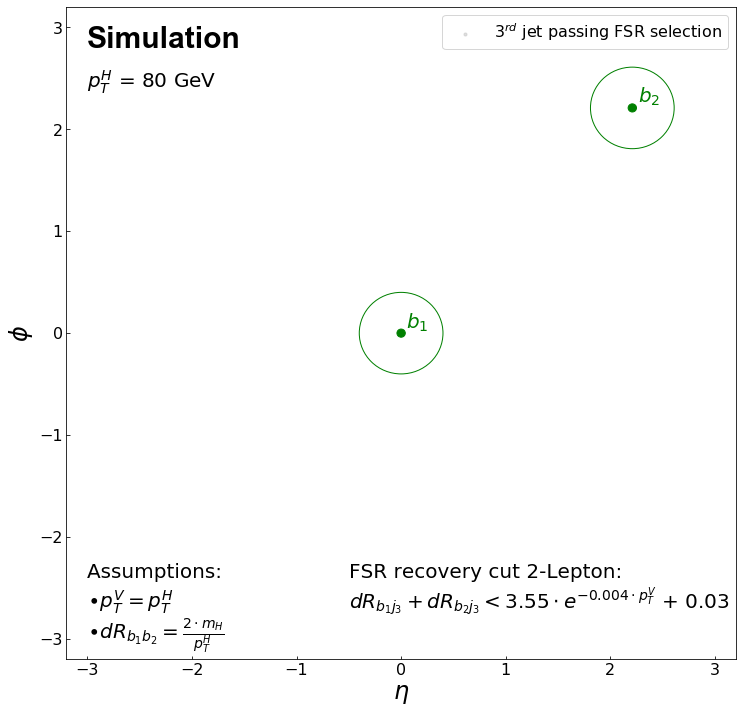

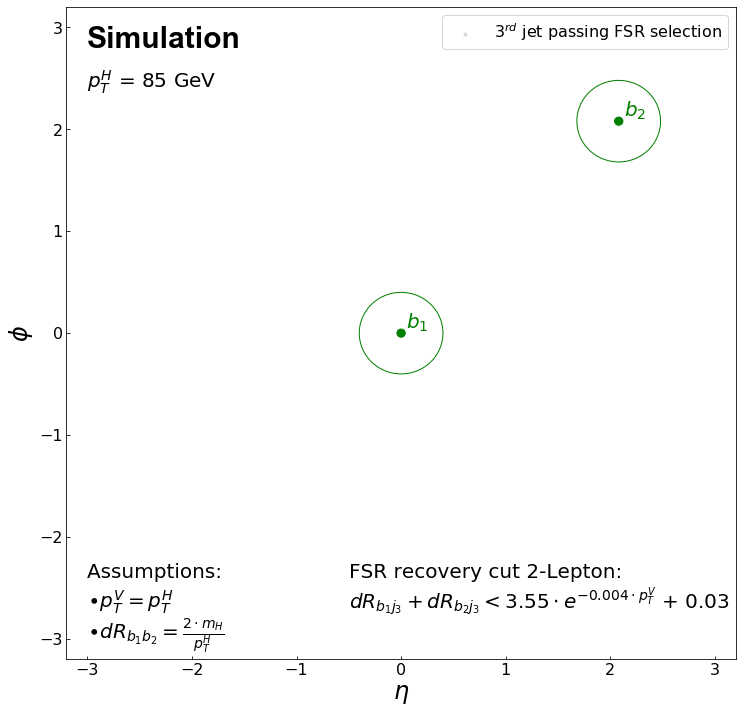

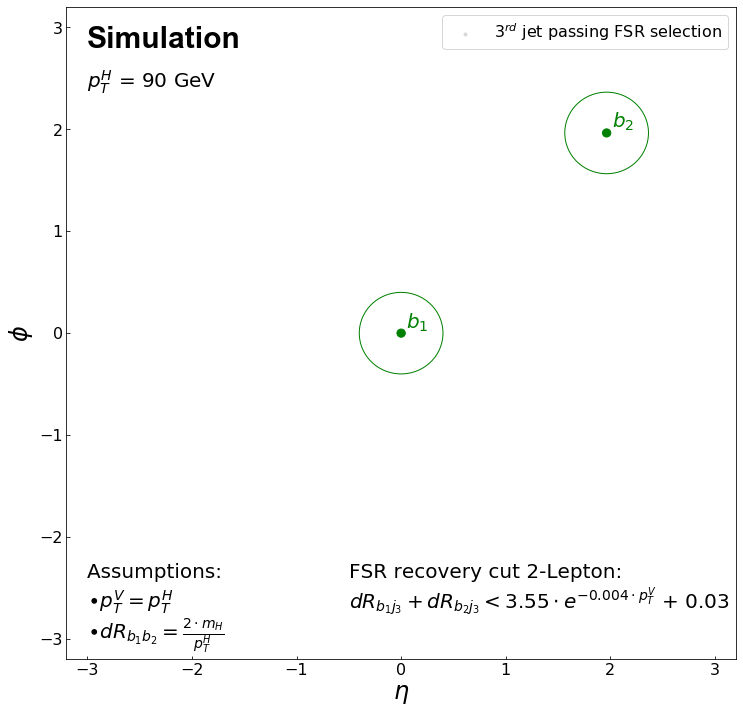

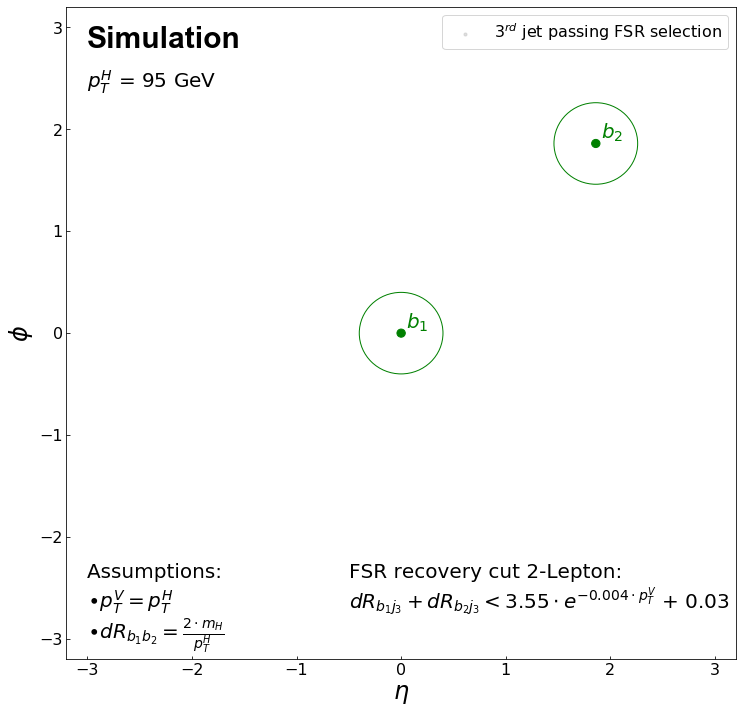

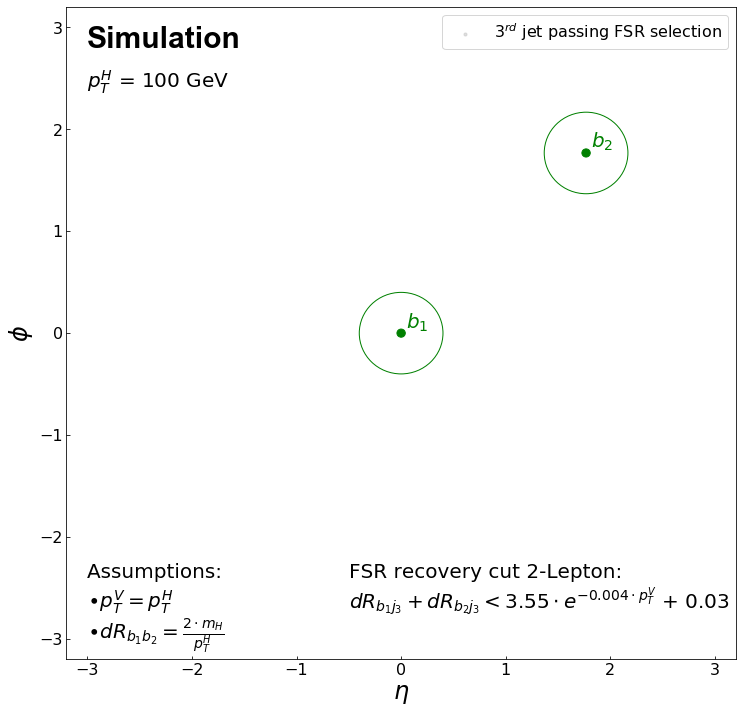

In [ ]:
# Plot
for pTH in range (75, 405, 5):
    
    dRbb = 2*125 / pTH
    rad2 = math.sqrt(2)
    
    TwoLep = True
    
    
    fig, ax = plt.subplots(figsize = (12,12)) 
    plt.scatter(j3eta_array, j3phi_array, s=area, c='white', alpha=0.5)
    #plt.title('Cut Evolution', fontsize=20)
    plt.xlabel('$\eta$', fontsize=24)
    plt.ylabel('$\phi$', fontsize=24)

    ax.set_xlim([-3.2,3.2])
    ax.set_ylim([-3.2,3.2])
    
    b1 = plt.Circle((0, 0), 0.4, color='green', fill=False)
    b1center = plt.Circle((0, 0), 0.04, color='green')
    
    b2eta = dRbb/rad2
    b2phi = dRbb/rad2
    
    j3eta_array_selected = []
    j3phi_array_selected = []
    for j3eta, j3phi in zip(j3eta_array, j3phi_array):
        dRb1j3 = math.sqrt(pow(j3eta,2)+pow(j3phi,2))
        dRb2j3 = math.sqrt(pow(j3eta-b2eta,2)+pow(j3phi-b2phi,2))
        
        if TwoLep == True:
            FSR_selection = dRb1j3 + dRb2j3 < 3.55 * numpy.exp(-0.004 * pTH) + 0.03
        else:
            FSR_selection = dRb1j3 + dRb2j3 < 1.95 * numpy.exp(-0.0013 * pTH) 
        
        if FSR_selection:
            j3eta_array_selected.append(j3eta)
            j3phi_array_selected.append(j3phi)
    
    plt.scatter(j3eta_array_selected, j3phi_array_selected, s=area, c='silver', alpha=0.5, label = '$3^{rd}$'+  ' jet passing FSR selection')
    
    b2 = plt.Circle((b2eta, b2phi), 0.4, color='green', fill=False)
    b2center = plt.Circle((b2eta, b2phi), 0.04, color='green')
    
    ax.text(0.05, 0.05, r'$b_1$', fontsize=20, c = 'green')
    ax.text(b2eta + 0.05, b2phi + 0.05, r'$b_2$', fontsize=20, c = 'green')
    
    ax.tick_params(direction = 'in')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    ax.add_artist(b1)
    ax.add_artist(b1center)
    ax.add_artist(b2)
    ax.add_artist(b2center)
    
    ax.text(-3, 2.8, 'Simulation', fontsize=30, fontweight='bold', fontname="Arial")
    ax.text(-3, 2.4, '$p_T^H$ = ' + str(pTH) + ' GeV', fontsize=20)
    
    if TwoLep == False:
        ax.text(-0.5, -2.4, 'FSR recovery cut 0-/1-Lepton: ', fontsize=20)
        ax.text(-0.5, -2.7, r'$dR_{b_1j_3} + dR_{b_2j_3} < 1.95 \cdot e^{-0.0013 \cdot p_T^V}$ ', fontsize=20)
    else:
        ax.text(-0.5, -2.4, 'FSR recovery cut 2-Lepton: ', fontsize=20)
        ax.text(-0.5, -2.7, r'$dR_{b_1j_3} + dR_{b_2j_3} < 3.55 \cdot e^{-0.004 \cdot p_T^V}$ + 0.03', fontsize=20)
    
    ax.text(-3., -2.4, 'Assumptions: ', fontsize=20)
    ax.text(-3., -2.7, r'$\bullet p_T^V=p_T^H$', fontsize=20)
    ax.text(-3., -3, r'$\bullet dR_{b_1b_2} =  \frac{2 \cdot m_H}  {p_T^H} $', fontsize=20)
    
    att = ''
    if TwoLep == True:
        att = 'TwoLep'
    else:
        att = 'ZeroOneLep'
    
    ax.legend(loc='upper right', fontsize = 16)
    
    plt.savefig('../Toy/FSR_pTH' + str(pTH) + '_' + att +'.png')
    plt.show()

In [ ]:
filenames = glob.glob('../Toy/*pTH*' + att + '.png')
filenames.sort()
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('../Toy/FSR_' + att + '.gif', images)